In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

#from sklearn.model_selection import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
df_raw = pd.read_csv('SocialMedia-Data/OnlineNewsPopularity.csv', low_memory=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [4]:
df_raw.head().transpose()

,0,1,2,3,4
url,http://mashable.com/2013/01/07/amazon-instant-...,http://mashable.com/2013/01/07/ap-samsung-spon...,http://mashable.com/2013/01/07/apple-40-billio...,http://mashable.com/2013/01/07/astronaut-notre...,http://mashable.com/2013/01/07/att-u-verse-apps/
timedelta,731,731,731,731,731
n_tokens_title,12,9,9,9,13
n_tokens_content,219,255,211,531,1072
n_unique_tokens,0.663594,0.604743,0.57513,0.503788,0.415646
...,...,...,...,...,...
title_subjectivity,0.5,0,0,0,0.454545
title_sentiment_polarity,-0.1875,0,0,0,0.136364
abs_title_subjectivity,0,0.5,0.5,0.5,0.0454545
abs_title_sentiment_polarity,0.1875,0,0,0,0.136364


In [5]:
urls = df_raw.url.copy()
df_raw.drop('url', axis=1, inplace=True)

In [6]:
stanScaler = StandardScaler()
stanScaler.fit(df_raw)
df_scaled =  stanScaler.transform(df_raw)

In [7]:
df_scaled.shape

(39644, 60)

In [8]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

In [9]:
df_pca.shape

(39644, 2)

Text(0, 0.5, '2nd PA')

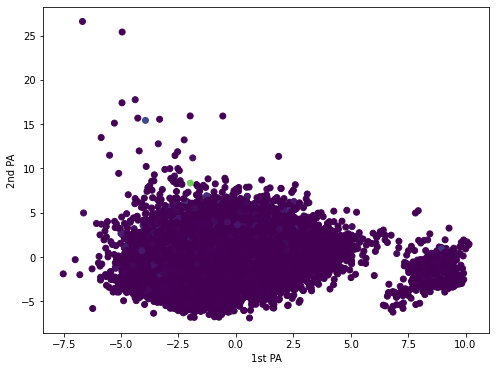

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=df_raw['shares'])
plt.xlabel('1st PA')
plt.ylabel('2nd PA')

In [11]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def model_results(trainX, testX, trainY, testY):
    RMSEs = []
    
    model_LinReg = LinearRegression(normalize=True,n_jobs=-1,)
    model_LogReg = LogisticRegression()
    model_RandForestReg = RandomForestRegressor(n_estimators=300,n_jobs=-1,max_depth=16, criterion='mse')
    model_SVC = SVC(random_state=9)
    model_linearSVC = LinearSVC()
    
    models = [model_LinReg, model_RandForestReg, model_LogReg, model_SVC, model_linearSVC]
    for model in models:
        model.fit(trainX, trainY)
        score = (RMSE(testY, model.predict(testX)))
        print(f'{model} : {score}')
    return models, RMSEs

In [33]:
trainX, testX, trainY, testY = train_test_split(df_pca, df_raw['shares'], random_state=30, test_size=0.40)

In [13]:
model_results(trainX, testX, trainY, testY)

LinearRegression(n_jobs=-1, normalize=True) : 12311.388007803105
RandomForestRegressor(max_depth=16, n_estimators=300, n_jobs=-1) : 13015.709659390162


E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 12573.54398309899
SVC(random_state=9) : 12576.100593816735


E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC() : 12583.144604651092


([LinearRegression(n_jobs=-1, normalize=True),
  RandomForestRegressor(max_depth=16, n_estimators=300, n_jobs=-1),
  LogisticRegression(),
  SVC(random_state=9),
  LinearSVC()],
 [])

> ### Linear Regression model seems to perform the best

In [34]:
model_LinReg = LinearRegression(copy_X=True, n_jobs=-1)
model_LinReg.get_params(deep=True)
prm_grd = {
    'fit_intercept' : [True, False],
    'normalize'     : [True, False],    
}
scoring = ['accuracy', 'max_error', 'neg_mean_squared_error']
kfold_16 = KFold(n_splits=16, shuffle=True, random_state=58)
gsCV = GridSearchCV(estimator=model_LinReg,
                    param_grid=prm_grd,
                    cv=kfold_16,
                    scoring=make_scorer(mean_squared_error),
                   )


In [35]:
gsCV.fit(trainX, trainY)

GridSearchCV(cv=KFold(n_splits=16, random_state=58, shuffle=True),
             estimator=LinearRegression(n_jobs=-1),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(mean_squared_error))

In [36]:
gsCV.best_estimator_

LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

In [37]:
model = LinearRegression(n_jobs=-1, normalize=True)
model.fit(trainX, trainY)
y_pred = model.predict(testX)
RMSE(testY, y_pred)

12077.101416957728